# Hands-on Machine Learning - Chapter 5 - Support Vector Machines - Exercises

# Exercise 10 - SVM Regressor on California Housing Dataset

## Imports

In [0]:
import numpy as np
np.random.seed(42)

# Plotting Imports
import matplotlib.pyplot as plt 
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Scikit-imports
from sklearn.svm import LinearSVR, SVR
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

## Loading and Preprocessing Data

In [0]:
from sklearn.datasets import fetch_california_housing

In [3]:
# Will download this dataset - requires an internet connection
housing = fetch_california_housing()

In [6]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [0]:
# Extracting features and targets
X = housing['data']
y = housing['target']

## Train-Test Split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling 

In [0]:
# Instantiate a StandardScaler
standardScaler = StandardScaler()

# Find mean and standard deviation for scaling using training data, and then scale it 
X_train_scaled = standardScaler.fit_transform(X_train) 

# Use mean and std from training data to transform the test data 
X_test_scaled = standardScaler.transform(X_test)

## Simple Linear Support Vector Regressor

Linear SVRs have a time complexity that scales almost linearly with both the number of features `n` and the number of samples `m`. So it's worth investigating the performance of a linear support vector machine before we implement more complicated (and resource-intensive) non-linear/kernelized models.

### Training

In [0]:
# Instantiate
linear_svr = LinearSVR(random_state=42)

In [11]:
# Fit to the scaled data
linear_svr.fit(X_train_scaled, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=42, tol=0.0001, verbose=0)

### Evaluating - Training Set

In [13]:
y_pred = linear_svr.predict(X_train_scaled)

# Mean Squared Error - useful if there are outliers in the data
mse = mean_squared_error(y_train, y_pred)
print("MSE on Training Set: {:.5f}".format(mse))

# RMSE Error - In the same units as the actual target, so good for comparison
rmse = np.sqrt(mse)
print("RMSE on Training Set: {:.5f}".format(rmse))

MSE on Training Set: 0.94997
RMSE on Training Set: 0.97466


## Kernelized SVM Regressor

The `target` of this dataset is the price of a house in tens of thousands of dollars. The RMSE is an error expressed in the same units as the target, and is a measure of the average error between the predictions and targets, with larger 'weightage' for larger errors (due to outliers). 

The results show that the predicted average error in the price of a house is $0.97466 \times \$ 10000 = \$9746.6$, which means our Linear SVM tends to make prediction errors that are approximately USD 10k higher or lower than the actual price of the house.

This is not a good model. Now let's a try a kernelized SVM regressor using the `rbf` function.  

Instead of using `GridSearchCV` to find the optimal value of hyperparameters from a list or grid of possible values, we'll use `RandomizedSearchCV` to find the optimal values of hyperparameters in a continuous distribution of possible values.

### Parameter Spaces/Distributions

In [0]:
# Different kind of continuous distributions for random variables
from scipy.stats import reciprocal, uniform

In [0]:
# Defining distributions for each possible parameter's values
param_distributions = {
    'gamma': reciprocal(0.001, 0.1), 
    'C': uniform(1, 10)
}

### Randomized Search for Cross Validation

Took 9.0s - 10.5s per fit, 4.6 min for fitting all folds.

In [20]:
# Draw 10 random pairs of values for each hyperparam, fit three folds 
random_search_cv = RandomizedSearchCV(estimator=SVR(), 
                                      param_distributions=param_distributions, 
                                      n_iter=10, 
                                      verbose=2, 
                                      cv=3, 
                                      random_state=42)
random_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=  10.5s
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s remaining:    0.0s


[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=  10.5s
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................
[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=  10.5s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   9.9s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   9.6s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   9.8s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .. C=2.560186404424365, gamma=0.002051110418843397, total=   8.9s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .. C=2.560186404424365, gamma=0.002051110418843397, total=   8.9s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  4.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff4108efb38>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff410984b70>},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

### Best Estimator

**Params Found Through Searching**

`C` = 4.745401188473625

`gamma` = 0.0796954818643928

**Default Prameter Values**
`cache_size` = 200

`coef0` = 0.0

`degree` = 3 

`epsilon` = 0.1

In [21]:
# What are the hyperparameters of the best estimator? 
random_search_cv.best_estimator_

SVR(C=4.745401188473625, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma=0.07969454818643928, kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

## Evaluation - Training Set 

Ideally, the RMSE on the training set should be lower than that of the linear SVM.

In [26]:
y_pred_train = random_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred_train)
print("RMSE on Training Set: {:.5f}".format(np.sqrt(mse)))

RMSE on Training Set: 0.57275


## Evaluation - Test Set

In [27]:
y_pred_test = random_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred_test)
print("RMSE on Test Set: {:.5f}".format(np.sqrt(mse)))

RMSE on Test Set: 0.59292


## Results

Using a kernelized SVM regressor (RBF kernel) and carrying out `RandomizedSearch` for its parameters resulted in a model that  ecreased the RMSE on the training set from ~0.97 to ~0.57, which is ~40% improvement. 

On the test set, this means our errors in housing price predictions are approximately $6,000. While this is far from ideal, it is still an improvement over the linear support vector regressor.

# Exercise 9 - SVM on MNIST

Will require one-versus-all classification since SVMs are binary classifiers. 

## Loading and Processing Data

Usually, we'd use a function like `train_test_split` to get the training and test data. However, with MNIST, its common practice to use the first 60,000 samples for the training set and the remaining 10,000 samples for the test set. 

This allows us to compare our results with those of other practitioners. 

In [0]:
from sklearn.datasets import fetch_openml 
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [0]:
# Extracting features and labels
X = mnist['data']
y = mnist['target'].astype(np.uint8)    # All labels are 8-bit integers, not floats or strings

In [0]:
# 60k samples for train, remaining 10k for split
N_TRAIN = 60000
X_train, y_train = X[:N_TRAIN], y[:N_TRAIN]
X_test, y_test = X[N_TRAIN:], y[N_TRAIN:]

In [94]:
# Confirming indexing performed correctly 
print("Training data and label shapes: ", X_train.shape, y_train.shape)
print("Test data and label shapes: ", X_test.shape, y_test.shape)

Training data and label shapes:  (60000, 784) (60000,)
Test data and label shapes:  (10000, 784) (10000,)


No need to shuffle this dataset, because it is already shuffled. 

## Linear SVM Classifier - Without Scaling

Will automatically use the one-vs-all strategy (also called one-vs-rest, OvR) for classification, so we don't really need to do anything other than call fit. 

Deliberately not scaling features for this model to show how poor SVM classification performance can be without proper feature scaling.

In [0]:
from sklearn.svm import LinearSVC, SVC

In [37]:
# Instantiate a classifier
lin_svm_clf = LinearSVC(random_state=42)

# Fit to the training data - Before scaling
lin_svm_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

### Evaluating Model Performance - Training Set

We will not evaluate on the test set because we still have lots of hyperparameter tuning to do, and we don't want to overfit to the test data.

In any case, making predictions on the training set will give us an idea of how good - or bad - our model is. If it's score is subpar on data it has already seen before, it will obviously not perform well on untrained data.

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
# Make predictions on the training set 
y_pred = lin_svm_clf.predict(X_train)

In [40]:
# Accuracy is number of correctly classified samples
accuracy_score(y_train, y_pred)

0.8733

This is a very poor accuracy, especially for the MNIST problem and especially for the training set. 

## Linear SVM Classifier - With Scaling

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
# Instantiate a StandardScaler
standardScaler = StandardScaler() 

# Fit to the training data to extract means and std for stanardization, then transform training data
X_train_scaled = standardScaler.fit_transform(X_train.astype(np.float32))

# Transform (but don't fit to) test set
X_test_scaled = standardScaler.transform(X_test.astype(np.float32))

### Training 

In [52]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

### Evaluating on Training Data

In [0]:
from sklearn.metrics import accuracy_score

In [58]:
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9226833333333333

Objectively, this is a good score. But on MNIST, higher scores are possible. This means we should explore non-linear or kernelized SVMs.

## SVC with RBF Kernel 

Past experiments show that the data is, at least partly, not linearly separable. Will probably get improved performance using a non-linear SVM with kernel function. 

In [0]:
# Instantiating an SVC with RBF kernel
svm_clf = SVC(kernel='rbf', gamma='scale')

### Training on Subset 

The time complexity of a non-linear SVM is much larger than that of a linear SVM. As such, it is more efficient to train and validate the SVM using a smaller subset of the training data. Once optimal hyperparameters have been identified in this way, the final SVM can be trained on the entire training data.

In [60]:
N_SAMPLES_SUBSET = 10000
svm_clf.fit(X_train_scaled[:N_SAMPLES_SUBSET], y_train[:N_SAMPLES_SUBSET])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Evaluating on Training Set

In [61]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_pred, y_train)

0.9455333333333333

## Kernelized SVM - Hyperparameter Tuning

An untuned, unregularized kernelized SVM offers much better performance on the training data than an unregularized linear SVC. 

This is why hyperparameter tuning of the kernelized SVM may actually be worthwhile. 

Will once again specify a distribution from which the value of a hyperparameter will be drawn. 

Will train `n_iter` different models, each of which will draw a different combination of hyperparameter values drawn from the specified distributions. 

The `RandomizedSearchCV` will then return the best model after training it on the entire data.

### Imports

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

### Defining Parameter Distributions 

In [0]:
param_distributions = {
    'gamma': reciprocal(0.001, 0.1),    # Smaller values have higher probabilities of being drawn
    'C': uniform(1, 10)                 # All values are equally likely to be drawn
}

### Randomized Cross Validation

In [0]:
svm_clf = SVC(kernel='rbf', gamma='scale', random_state=42)

In [0]:
rnd_search_cv = RandomizedSearchCV(svm_clf, 
                                   param_distributions, 
                                   n_iter=10, 
                                   verbose=2,
                                   cv=3)

In [74]:
# Must specify the y_train data too, otherwise won't get best estimator
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=4.998609717152554, gamma=0.001239742034078414 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. C=4.998609717152554, gamma=0.001239742034078414, total=   0.9s
[CV] C=4.998609717152554, gamma=0.001239742034078414 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .. C=4.998609717152554, gamma=0.001239742034078414, total=   0.9s
[CV] C=4.998609717152554, gamma=0.001239742034078414 .................
[CV] .. C=4.998609717152554, gamma=0.001239742034078414, total=   0.9s
[CV] C=10.737555188414591, gamma=0.002921074818565714 ................
[CV] . C=10.737555188414591, gamma=0.002921074818565714, total=   1.1s
[CV] C=10.737555188414591, gamma=0.002921074818565714 ................
[CV] . C=10.737555188414591, gamma=0.002921074818565714, total=   1.1s
[CV] C=10.737555188414591, gamma=0.002921074818565714 ................
[CV] . C=10.737555188414591, gamma=0.002921074818565714, total=   1.1s
[CV] C=1.906064345328208, gamma=0.017249321573179 ....................
[CV] ..... C=1.906064345328208, gamma=0.017249321573179, total=   1.3s
[CV] C=1.906064345328208, gamma=0.017249321573179 ....................
[CV] ..... C=1.906064345328208, gamma=0.017249321573179, total=   1.3s
[CV] C=1.906064345328208, gamma=0.017249321573179 ....................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   35.7s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=42,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff4106bf240>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff4106bff28>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

## Results of Randomized Search

In [75]:
# What is the best estimator? 
rnd_search_cv.best_estimator_

SVC(C=4.998609717152554, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.001239742034078414, kernel='rbf', max_iter=-1, probability=False,
    random_state=42, shrinking=True, tol=0.001, verbose=False)

In [76]:
# What is the accuracy score for this estimator?
rnd_search_cv.best_score_

0.8639927352502204

This score is lower than the unregularized, kernelized SVM we trained on 1/6th of the available data. However, we need to recognize the fact that we're cross validating on only a dataset that is 10 time smaller than the one originally used for the kernelized SVM.

This score will likely increase when the model is trained with the same hyperparameters on more data.

The advantage of this approach is that cross validation is quicker, so we can train more models with different values for the hyperparameters. This speeds up the process of hyperparameter tuning.

### Retraining Best Estimator

Now that we've identified the best estimator, we can train it on the entire training set of 60,000 samples. 

This will take a lot of time to train. 

But the technique of tuning hyperparameters using a smaller subset of the training data is useful for models like SVM with high time complexity.

In [77]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=4.998609717152554, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.001239742034078414, kernel='rbf', max_iter=-1, probability=False,
    random_state=42, shrinking=True, tol=0.001, verbose=False)

### Evaluating on Training Set

In [78]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.997

While this is a very good score, it is indicative of overfitting. The actual test set score will be lower.

### Evaluating on Test Set

In [79]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9728

## Best Model

The best SVM model found by the ML community uses the following hyperparameters 
 - `C` = 5 
 - `gamma` = 0.005 

 It gives a test set accuracy of over 98%. 

 We can find this by running randomized search for longer and on a larger part of the training set. 

In [0]:
# Instantiating SVC 
svc_best = SVC(kernel='rbf', gamma=0.005, C=5, random_state=42)

In [98]:
# Training
svc_best.fit(X_train_scaled, y_train)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [99]:
# Evaluating on Training Data
accuracy_score(y_train, svc_best.predict(X_train_scaled))

0.9999833333333333

In [101]:
# Evaluating on Test Data
accuracy_score(y_test, svc_best.predict(X_test_scaled))

0.945

# Exercise 8 - Linear SVC and SGD Classifier

Train a `LinearSVC` on a linearly separable dataset.

Then train an `SVC` and a `SGDClassifier` on the same dataset. 

See if you can get them to produce roughly the same model.

In [0]:
from sklearn.linear_model import SGDClassifier 
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler

# The iris dataset is linearly separable when transformed to a binary problem
from sklearn.datasets import load_iris

## Importing Data

In [0]:
# Loading data
iris = load_iris()

# Extracting features and labels
X = iris['data'][:, (2, 3)]   # Petal length and petal width
y = iris['target']

In [0]:
# Setosa is one class, versicolor is another - disregard virginica

# Extract indices of both setosa and versicolor flowers from labels
setosa_or_versicolor = (y == 0) | (y == 1)

# Use indices to extract corresponding features and labels
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

## Classifiers

### Common Parameters

In [0]:
C = 5    # Regularization -> higher C -> more regularization -> narrower margin 
alpha = 1 / (C * len(X))    # For SGD Classifier

### Instantiating

In [0]:
# Instantiating different classifiers 
lin_clf = LinearSVC(loss='hinge', C=C, random_state=42)
svm_clf = SVC(kernel='linear', C=C)
sgd_clf = SGDClassifier(loss='hinge', learning_rate='constant', eta0=0.001, 
                        alpha=alpha, max_iter=1000, tol=1e-3, random_state=42)

### Scaling Features

In [0]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)

### Fitting Models

In [112]:
lin_clf.fit(X_train_scaled, y)
svm_clf.fit(X_train_scaled, y)
sgd_clf.fit(X_train_scaled, y)

SGDClassifier(alpha=0.002, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='constant', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

### Comparing Final Coefficients

In [113]:
print("LinearSVC\n", lin_clf.intercept_, lin_clf.coef_)
print("SVC\n", svm_clf.intercept_, svm_clf.coef_)
print("SGD (alpha = {:.5f})\n".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC
 [0.28474272] [[1.05364736 1.09903308]]
SVC
 [0.31896852] [[1.1203284  1.02625193]]
SGD (alpha = 0.00200)
 [0.117] [[0.77714169 0.72981762]]


## Plotting Decision Boundaries

In [0]:
# Compute the slope and bias of each decision boundary
w1 = -lin_clf.coef_[0, 0] / lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0] / lin_clf.coef_[0, 1]

w2 = -svm_clf.coef_[0, 0] / svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0] / svm_clf.coef_[0, 1]

w3 = -sgd_clf.coef_[0, 0] / sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0] / sgd_clf.coef_[0, 1]

In [0]:
# Transform the decision boundary lines back to the original scale 
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

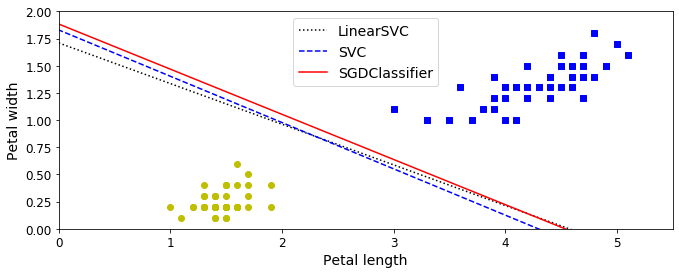

In [119]:
# Plot all three decision boundaries 
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], 'k:', label='LinearSVC')
plt.plot(line2[:, 0], line2[:, 1], 'b--', label='SVC')
plt.plot(line3[:, 0], line3[:, 1], 'r-', label='SGDClassifier')

# Plotting samples
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"

# Annotating graph
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

# Exercises 1 - 7

## Exercise 1 

What is the fundamental idea behind support vector machines?

**SVM Classifiers**
- SVM classifiers attempt to fit the widest possible street between samples of the two classes.
- The classification boundary is fully supported or determined by the samples (or vectors) of the two classes that are closest to each other. 
- The goal is to have the largest possible margin between the classification boundary that separates the two classes and the training instances. 
- Classification can be of two types
  - hard margin: the SVM classifier ensures that there are no margin violations, which often leads to a narrower margin. 
  - soft margin: SVM classifier allows some margin violations, leading to a wider margin. 

**SVM Regressors**
- SVM will still attempt to fit the a hypothesis hyperplane to the data, and the hyperplane will still have a margin.
- The goal is still, in part, to maximise the margin.
- However, the regressor now tries to fit as many samples within the margin as possible. 
- Margin violations in case of the SVM regressor occur when samples are not present within the margin. 

**Kernel Trick**
- SVMs can be used for both linearly separable and non-linearly separably classification and regression.
- In the case of the latter, the SVM uses a kernel trick: low dimensional features are passd to a kernel function, which is used to compute the equivalent dot product of highly non-linear features (polynomial features, similarity features) without actually computing the values of the features in a higher dimensional space. 

## Exercise 2

**What is a Support Vector?**

The classification boundary/hypothesis function of a SVM is fully determined or supported by samples vectors of the input features that are on the edge of the margin or within the margin. These vectors are called support vectors. 

In the SVM margin-street analogy, vectors representing any samples **on** the street are the support vectors. 

- Decison boundary of an SVM classifier is not affected by any samples that aren't support vectors.
- Predictions made by SVMs involve the support vectors, not the entire training set.

## Exercise 3

**Why is it important to scale inputs when using SVMs?**

SVMs are highly sensitive to feature scaling and outliers. The goal of SVMs is to fit the largest possible street between classes (in a classification problem). If the features are not scaled, the SVM will tend to neglect small features. 

## Exercise 4

**Can an SVM classifier output a confidence score when it classifies an instance? What about a probability?**

- SVM classifiers **cannot** output confidence scores or probabilities directly: by default, their output is always a class label. 
- SVMs can, however, output the distance between a test set instance and the decision boundary, which can be used as a confidence score.
- Confidence score cannot be directly converted int oa probabilty.
- In `sklearn`, if the `probability` argument is set to `True` when instantiating an `SVC`, the `SVC` will output a probability. But these probabilities will be derived using a `LogisticRegression` model which will have been using 5-fold cross validation on the training set, and will drastically slow down training. 

## Exercise 5 

Should you use the primal or dual form of the SVM problem to train a model on a training set with `m` = 1M instances, and `n` = 100s of features?

When the number of features `n` is much larger than the number of instances `m`, it is more computationally efficient to use the **primal** form of the SVM.

This is because the primal form has approximate complexity of $\mathcal{O}(m)$, whereas the dual form has a time complexity between $\mathcal{O}(m^2 \times n)$ and $\mathcal{O}(m^3 \times n)$. 

This only applies to Linear SVCs. Kernelized SVCs can only use the dual form.

## Exercise 6  

**Say you trained an SVM using the RBF kernel. It seems to underfit the training set. Should you increase or decrease `gamma`? What about `C`?

Too much regularization.
- Increase `C`
- Increase `gamma`